In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Check DataTypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

#### fixing datatypes

In [5]:
{col: df[col].nunique() for col in df if df[col].dtype == 'object'}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [6]:
df = df.astype({
    'sex': 'category',
    'embarked': 'category',
    'who': 'category',
    'embark_town': 'category',
    'alive': 'category',
    }
)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.sex = df.sex.cat.codes
df.alive = df.alive.cat.codes
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True


it seems that `embarked` and `embark_town` are similar, lets check this :

In [8]:
df['embarked'].equals(
    df['embark_town'].apply(lambda city: city[0])
)

True

our guess is correct, lets drop embarked column :

In [9]:
df = df.drop('embarked', axis=1)

<br> also, if you check, some columns seem to be the same, let's check them <br>
if they are the same, drop them

In [10]:
df['who'].head()

0      man
1    woman
2    woman
3    woman
4      man
Name: who, dtype: category
Categories (3, object): ['child', 'man', 'woman']

In [11]:
df['sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int8

In [12]:
df['who'].nunique()

3

In [13]:
df['sex'].nunique()

2

they are not the same

## check correlation

In [14]:
df.corr().style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


<br> <br>

In [15]:
df.corr()[ ['survived'] ].style.background_gradient(cmap='coolwarm')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


<br></br>
you could also use `corrwith()`

In [16]:
df.corrwith(df['survived']).to_frame().style.background_gradient(cmap='coolwarm')

,0
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


it seems that we have a good **negative** correlation between **survived** and **sex**  

<br> you can deffine your custom hihglites :

In [17]:
def highlight_cells(val, thresholds, abs_value=True):
    red_thresh, yellow_thresh, green_thresh = thresholds
    if abs_value:
        val = abs(val)
    
    if val > green_thresh:
        color = 'palegreen'
    elif val > yellow_thresh:
        color = 'yellow'
    else:
        color = ''
    
    return 'background-color: {}'.format(color)

In [18]:
df.corr()[ ['survived'] ].style.applymap(highlight_cells, thresholds=[0, 0.2, 0.5])

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


<br> <br>

In [19]:
abs(df.corr()).style.highlight_min(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
pclass,0.338481,1.000000,0.131900,0.369226,0.083081,0.018443,0.549500,0.094035,0.338481,0.135207
sex,0.543351,0.131900,1.000000,0.093254,0.114631,0.245489,0.182333,0.908578,0.543351,0.303646
age,0.077221,0.369226,0.093254,1.000000,0.308247,0.189119,0.096067,0.280328,0.077221,0.198270
sibsp,0.035322,0.083081,0.114631,0.308247,1.000000,0.414838,0.159651,0.253586,0.035322,0.584471
parch,0.081629,0.018443,0.245489,0.189119,0.414838,1.000000,0.216225,0.349943,0.081629,0.583398
fare,0.257307,0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.182024,0.257307,0.271832
adult_male,0.557080,0.094035,0.908578,0.280328,0.253586,0.349943,0.182024,1.000000,0.557080,0.404744
alive,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
alone,0.203367,0.135207,0.303646,0.198270,0.584471,0.583398,0.271832,0.404744,0.203367,1.000000


## Describe

In [20]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,alive
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


> - the mean of survived people is 0.38, which means almost 38% of people survived (??)
> - in age column, the std is 14 and mean is 29, we can say that the age range of most of the people is in 15,43 years

In [21]:
df[df['age'] == 0.42]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,1,0.42,0,1,8.5167,Third,child,False,NaN,Cherbourg,1,False


In [22]:
df.describe(include=['category'])

,class,who,deck,embark_town
count,891,891,203,889
unique,3,3,7,3
top,Third,man,C,Southampton
freq,491,537,59,644


## Missing Values Check

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,0,True


In [24]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

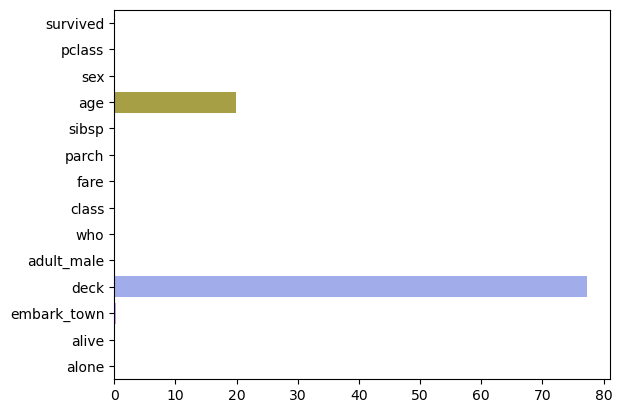

In [25]:
sns.barplot(
    x=df.isna().sum() / df.shape[0]*100,
    y=df.columns
)

deck has too many NA values, lets drop them :

In [26]:
df = df.drop(columns='deck')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,Third,man,True,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,First,woman,False,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,Southampton,0,True


but we an keep age, and guess other values, lets examine age :

In [27]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [28]:
df['age'].isna().sum()

177

lets fill the nan values with the mean :

In [29]:
new_age = df['age'].fillna(value=df['age'].mean())
new_age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

let's see the results : <br>

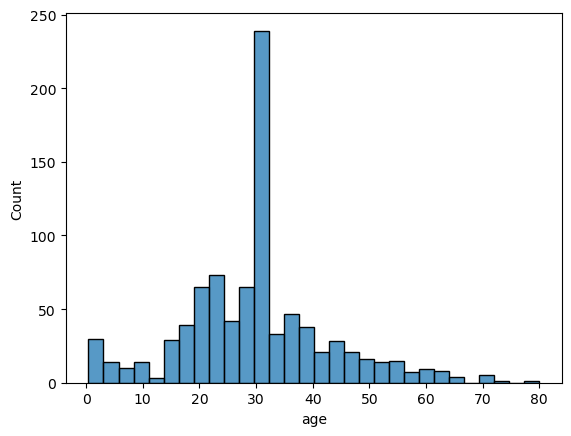

In [30]:
sns.histplot(new_age);

good, but the mean is too big, let's test somthing else :<br> <br>

In [31]:
df.corr()[['age']].style.background_gradient(cmap='coolwarm')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alive,-0.077221
alone,0.198270


we have a good correlatoin with `plcass`

___

In [32]:
df['pclass'].isna().sum()

0

and it has no nan values.

In [33]:
df.groupby(df['pclass'])['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [34]:
def age_fillna_method(index, df) :
    pclass1_mean, pclass2_mean, pclass3_mean = df.groupby(df['pclass'])['age'].mean() 
    
    if df.iloc[index, :]['pclass'] == 1 : return pclass1_mean
    elif df.iloc[index, :]['pclass'] == 2 : return pclass2_mean
    elif df.iloc[index, :]['pclass'] == 3 : return pclass3_mean


In [35]:
nan_age = df['age'].isna()
nan_age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [36]:
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [48]:
# for index, value in nan_age.iteritems() :
#     if value is True : # the age is NaN
#         df['age'].loc[index] = age_fillna_method(index, df)
        

In [49]:
df['age'].head(10)

0    22.00000
1    38.00000
2    26.00000
3    35.00000
4    35.00000
5    25.14062
6    54.00000
7     2.00000
8    27.00000
9    14.00000
Name: age, dtype: float64

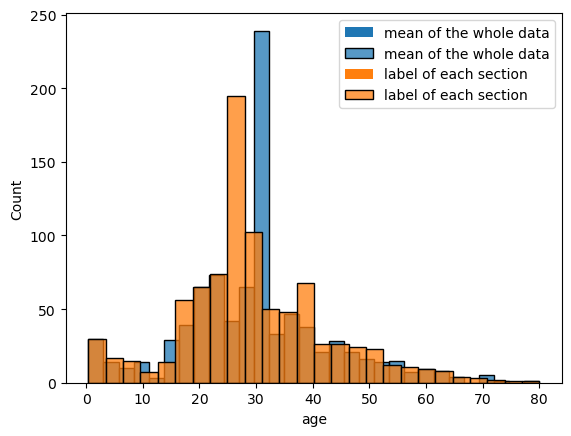

In [99]:
sns.histplot(new_age, label='mean of the whole data'); 
sns.histplot(df['age'], label='label of each section'); 
plt.legend();

In [51]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

___

In [98]:
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [77]:
df.groupby(['adult_male', 'sex', ]).age.mean()

adult_male  sex
False       0      27.852746
            1       5.466750
True        1      31.909719
Name: age, dtype: float64

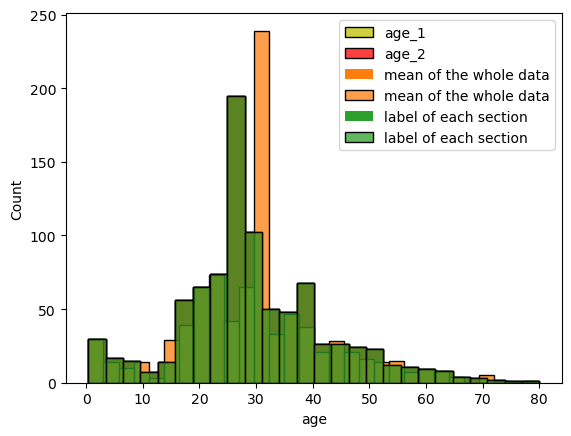

In [112]:
df['age_1'] = df['age'].fillna(df.groupby(['adult_male', 'sex'])['age'].transform('mean'))
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))
ax = sns.histplot(df.age)
ax = sns.histplot(df.age_1, ax=ax, color='y', label='age_1')
ax = sns.histplot(df.age_2, ax=ax, color='r', label='age_2')

sns.histplot(new_age, label='mean of the whole data'); 
sns.histplot(df['age'], label='label of each section');
plt.legend()